In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('Churn Modeling.csv')

In [65]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [67]:
df.isnull().sum()
#0 null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [69]:
dict_name = {'Male':1,'Female':0}
df['Gender'] = df['Gender'].map(dict_name)
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [70]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [71]:
dict_geo = {'France':2,'Germany':1,'Spain':0}
df['Geography'] = df['Geography'].map(dict_geo)
df['Geography'].value_counts()

2    5014
1    2509
0    2477
Name: Geography, dtype: int64

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Exited', ylabel='count'>

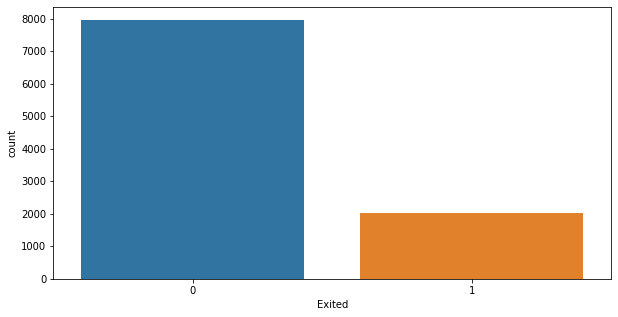

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(df['Exited'])

In [73]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

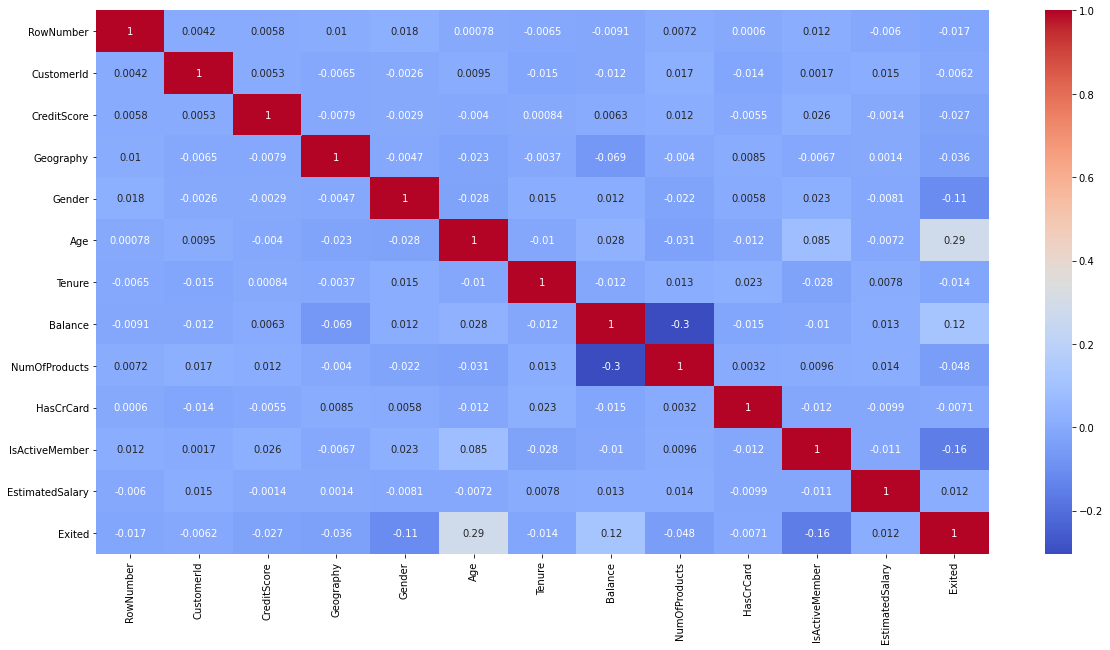

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm', annot = True)
# a very poorly correlated data

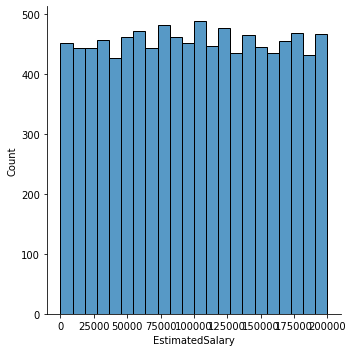

In [75]:
sns.displot(df['EstimatedSalary'])

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

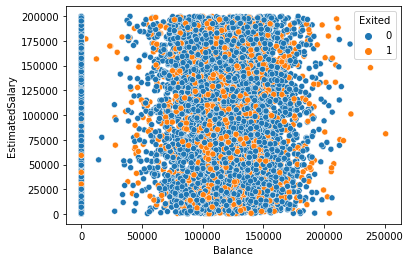

In [76]:
sns.scatterplot(x = df['Balance'],y = df['EstimatedSalary'], hue = df['Exited'])

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Balance', ylabel='NumOfProducts'>

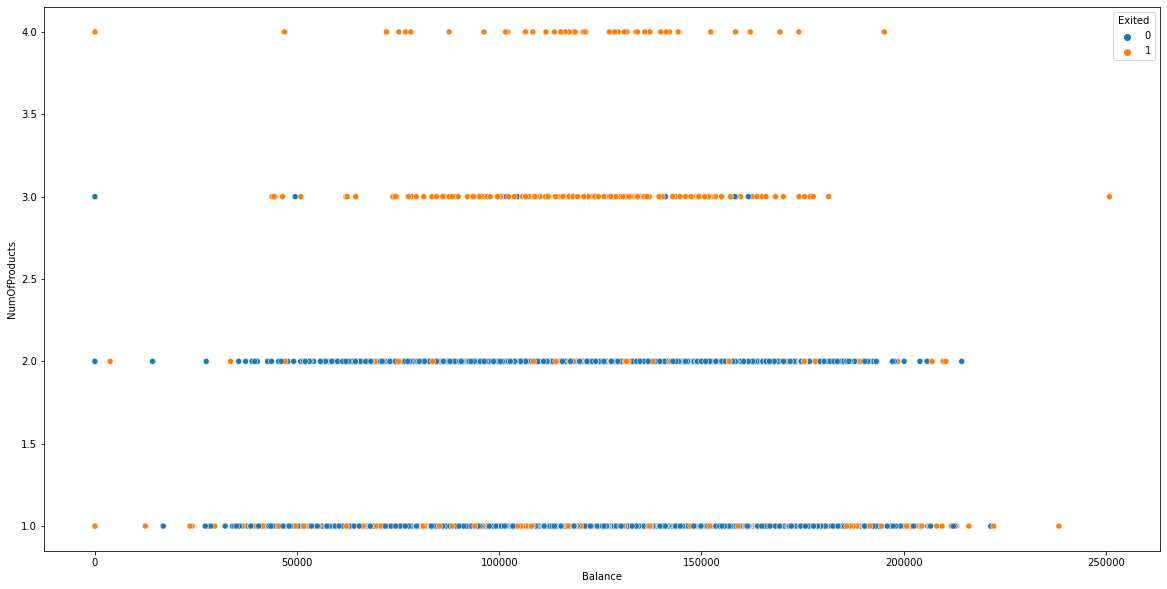

In [77]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Balance'], df['NumOfProducts'], hue = df['Exited'])

In [78]:
#Though balance may not affect exiting, the higher the number of products the greater the exits
#Estimated salary and Balance have got nothing to do with exiting

C:\Users\saran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Geography', ylabel='count'>

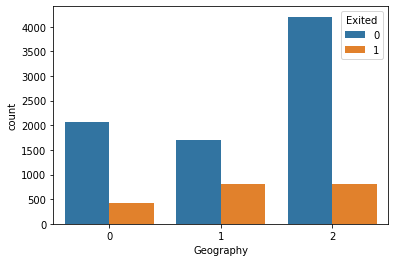

In [79]:
sns.countplot(df['Geography'], hue=df['Exited'])
#Exits are rather consistent geographically

In [80]:
#indentifying outliers
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [81]:
d_features = ['CreditScore','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
              'IsActiveMember', 'EstimatedSalary', 'Exited']
import plotly.express as ex

In [82]:
plt.figure(figsize=(20,10))
ex.box(df[d_features])

<Figure size 1440x720 with 0 Axes>

In [83]:
d_features2 = ['Tenure', 'NumOfProducts', 'HasCrCard',
              'IsActiveMember', 'Exited']
plt.figure(figsize=(20,10))
ex.box(df[d_features2])

<Figure size 1440x720 with 0 Axes>

In [343]:
df = df.sample(frac = 1)
df_exit = df.loc[df['Exited'] == 1]
df_nexit = df.loc[df['Exited'] == 0]
df_new = pd.concat([df_exit,df_nexit])
df_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [344]:
#little to almost no extreme outliers in the dataset moreover there are no null values as well 
#using relevant columns
X = df_new[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'EstimatedSalary']]
y = df_new['Exited']

In [345]:
#using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y)

In [346]:
mm.fit(X_train)
X_train = mm.transform(X_train)

In [347]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout

In [348]:
model = Sequential() 
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [349]:
model.fit(x = X_train, y =y_train, epochs=100, validation_data = (X_test,y_test))


Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.7006 - val_loss: 2759.5149
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5813 - val_loss: 8032.4146
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5138 - val_loss: 10297.1494
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5058 - val_loss: 10016.2891
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5007 - val_loss: 8553.2822
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4949 - val_loss: 6954.3965
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4877 - val_loss: 5990.3633
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4810 - val_loss: 6593.4331
Epoch 9/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4736 - val_loss: 7556.7896
Epoch 10/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4669

79/79 [==============================] - 0s 2ms/step - loss: 0.3672 - val_loss: 88956.3828
Epoch 81/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3664 - val_loss: 95063.2656
Epoch 82/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3687 - val_loss: 94117.0938
Epoch 83/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3671 - val_loss: 92648.6172
Epoch 84/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3684 - val_loss: 97635.5859
Epoch 85/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3663 - val_loss: 89955.7031
Epoch 86/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3662 - val_loss: 95364.1953
Epoch 87/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3654 - val_loss: 96586.9219
Epoch 88/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3652 - val_loss: 97207.7266
Epoch 89/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3

In [350]:
losses = pd.DataFrame(model.history.history)
ex.line(losses)

In [351]:
#EXTREME OVERFITTING

In [352]:
model = Sequential() 
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [353]:
from tensorflow.keras.callbacks import EarlyStopping
#tracking validation loss and stop the training
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose = 1)#stopping when val_loss is minimum and 
#running the model 25 epochs more even after the minimum 
model.fit(x = X_train, y =y_train, epochs=100, validation_data = (X_test,y_test), callbacks=[early_stop])

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.5825 - val_loss: 7032.5254
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5002 - val_loss: 4785.8760
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4890 - val_loss: 4259.9189
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4764 - val_loss: 8435.3203
Epoch 00004: early stopping


In [354]:
losses_new = pd.DataFrame(model.history.history)
ex.line(losses_new)

In [355]:
predictions = model.predict(X_test)

In [358]:
df_pred = pd.DataFrame(predictions, columns =['P'])
df_pred[(df_pred['P'] != 1) &(df_pred['P'] != 0)]
df_pred.loc[5268,'P'] = 0
df_pred.loc[7430,'P'] = 0
df_pred.loc[7497,'P'] = 0

In [359]:
from sklearn.metrics import classification_report,confusion_matrix

In [360]:
df_pred.value_counts()

P  
0.0    3962
1.0    3538
dtype: int64

In [361]:
df_test = pd.DataFrame(y_test)
df_test.value_counts()

Exited
0         5959
1         1541
dtype: int64

In [362]:
print(classification_report(y_test,df_pred['P']))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66      5959
           1       0.24      0.56      0.34      1541

    accuracy                           0.55      7500
   macro avg       0.54      0.56      0.50      7500
weighted avg       0.71      0.55      0.60      7500



In [363]:
print(confusion_matrix(y_test,df_pred['P']))

[[3284 2675]
 [ 678  863]]


In [364]:
accuracy_score(y_test,df_pred['P'])

0.5529333333333334